## Libraries

In [2]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
import plotly.graph_objects as go;
from mpl_toolkits.mplot3d import Axes3D


## Import Data

In [3]:


training_data = pd.read_csv('epl-training.csv')
training_data2 = pd.read_csv('epl-training2.csv')

com_data = pd.concat([training_data, training_data2])
com_data.reset_index(drop=True, inplace=True)

teams_in_training_data2 = set(training_data2['HomeTeam']).union(set(training_data2['AwayTeam']))
com_data_filtered = com_data[com_data['HomeTeam'].isin(teams_in_training_data2) & com_data['AwayTeam'].isin(teams_in_training_data2)]

pd.set_option('display.max_columns',None)
com_data.to_csv('com.csv', index=False)

pd.set_option('display.max_columns',None)
com_data_filtered.to_csv('com2.csv', index=False)

#training_data2
#com_data
com_data_filtered

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Div,Time,B365H,B365D,B365A,BWH,BWD,BWA,BFH,BFD,BFA,PSH,PSD,PSA,WHH,WHD,WHA,1XBH,1XBD,1XBA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,BFEH,BFED,BFEA,B365>2.5,B365<2.5,P>2.5,P<2.5,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,BFE>2.5,BFE<2.5,AHh,B365AHH,B365AHA,PAHH,PAHA,MaxAHH,MaxAHA,AvgAHH,AvgAHA,BFEAHH,BFEAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,BFCH,BFCD,BFCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,1XBCH,1XBCD,1XBCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,BFEC>2.5,BFEC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
1,19/08/2000,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,Graham Barber,17.0,12.0,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,19/08/2000,Leicester,Aston Villa,0.0,0.0,D,0.0,0.0,D,Mike Riley,5.0,5.0,4.0,3.0,5.0,4.0,12.0,12.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,19/08/2000,Tottenham,Ipswich,3.0,1.0,H,2.0,1.0,H,Alan Wiley,20.0,15.0,6.0,5.0,3.0,4.0,14.0,13.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,20/08/2000,Man United,Newcastle,2.0,0.0,H,1.0,0.0,H,Steve Lodge,19.0,9.0,9.0,6.0,7.0,1.0,7.0,13.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,21/08/2000,Arsenal,Liverpool,2.0,0.0,H,1.0,0.0,H,Graham Poll,17.0,7.0,12.0,4.0,10.0,11.0,25.0,20.0,2.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,09/11/2024,Liverpool,Aston Villa,2.0,0.0,H,1.0,0.0,H,D Coote,14.0,12.0,5.0,2.0,2.0,9.0,11.0,15.0,0.0,3.0,0.0,0.0,E0,20:00,1.42,5.25,6.50,1.44,5.00,6.25,1.40,5.0,6.50,1.42,5.45,6.70,1.44,4.8,7.0,1.44,5.35,6.98,1.45,5.50,7.40,1.42,5.26,6.70,1.46,5.5,7.20,1.44,2.75,

## Data Cleaning

In [23]:
sub_data = com_data_filtered [['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST']]
sub_data

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST
1,Chelsea,West Ham,4.0,2.0,H,17.0,12.0,10.0,5.0
5,Leicester,Aston Villa,0.0,0.0,D,5.0,5.0,4.0,3.0
8,Tottenham,Ipswich,3.0,1.0,H,20.0,15.0,6.0,5.0
9,Man United,Newcastle,2.0,0.0,H,19.0,9.0,9.0,6.0
10,Arsenal,Liverpool,2.0,0.0,H,17.0,7.0,12.0,4.0
...,...,...,...,...,...,...,...,...,...
9326,Liverpool,Aston Villa,2.0,0.0,H,14.0,12.0,5.0,2.0
9327,Man United,Leicester,3.0,0.0,H,13.0,6.0,3.0,5.0
9328,Nott'm Forest,Newcastle,1.0,3.0,A,9.0,17.0,3.0,6.0
9329,Tottenham,Ipswich,1.0,2.0,A,17.0,8.0,5.0,3.0


Referee Influence

In [24]:
ref_data = com_data_filtered [['HomeTeam', 'AwayTeam', 'Referee', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']]
ref_data

,HomeTeam,AwayTeam,Referee,HF,AF,HY,AY,HR,AR
1,Chelsea,West Ham,Graham Barber,19.0,14.0,1.0,2.0,0.0,0.0
5,Leicester,Aston Villa,Mike Riley,12.0,12.0,2.0,3.0,0.0,0.0
8,Tottenham,Ipswich,Alan Wiley,14.0,13.0,0.0,0.0,0.0,0.0
9,Man United,Newcastle,Steve Lodge,7.0,13.0,0.0,1.0,0.0,0.0
10,Arsenal,Liverpool,Graham Poll,25.0,20.0,2.0,4.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
9326,Liverpool,Aston Villa,D Coote,11.0,15.0,0.0,3.0,0.0,0.0
9327,Man United,Leicester,P Bankes,9.0,5.0,0.0,1.0,0.0,0.0
9328,Nott'm Forest,Newcastle,A Taylor,13.0,6.0,1.0,1.0,0.0,0.0
9329,Tottenham,Ipswich,D England,10.0,19.0,1.0,5.0,0.0,0.0


              Team  Points
0       Man United     993
1        Liverpool     987
2         Man City     954
3          Arsenal     948
4          Chelsea     891
5        Tottenham     768
6          Everton     564
7        Newcastle     549
8      Aston Villa     450
9         West Ham     438
10     Southampton     342
11          Fulham     297
12       Leicester     294
13          Wolves     258
14  Crystal Palace     258
15        Brighton     207
16     Bournemouth     171
17       Brentford     108
18   Nott'm Forest      60
19         Ipswich      51


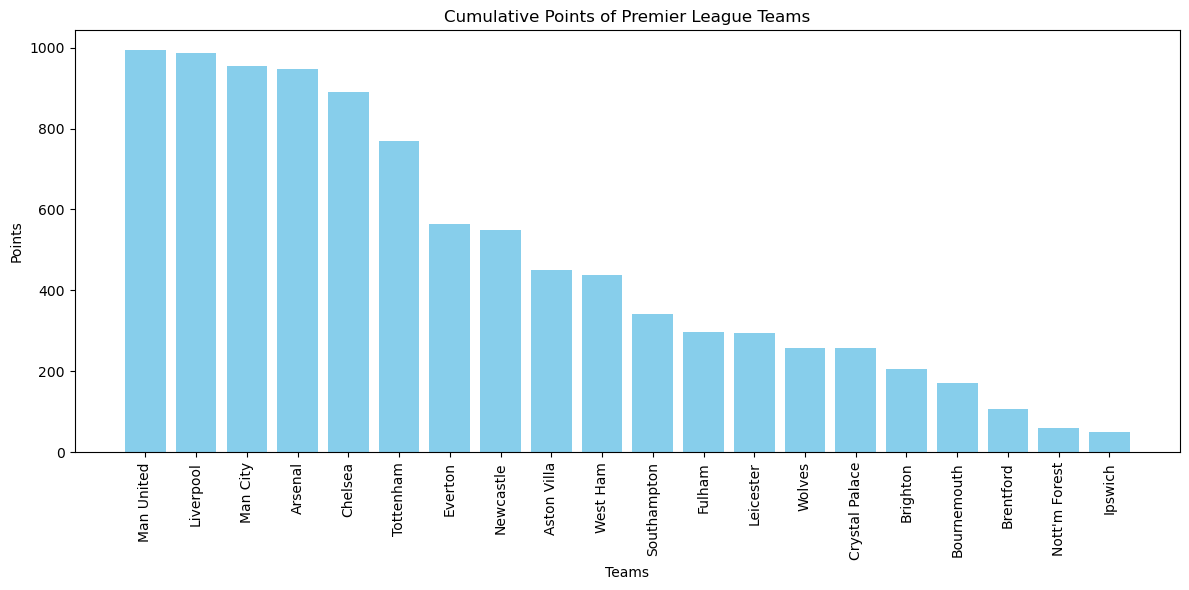

In [25]:
# Create a dictionary to store the points for each team 
points = {}

def update_points(team, pts): 
    if team in points: 
        points[team] += pts 
    else: 
        points[team] = pts


for index, row in sub_data.iterrows():
    home_team = row['HomeTeam']
    away_team= row['AwayTeam']
    result = row['FTR']

    if result == 'H':
        update_points(home_team, 3)
        update_points(away_team, 0)
    elif result =='A':
        update_points(home_team, 0)
        update_points(away_team, 3)
    elif result == 'L':
        update_points(home_team, 1)
        update_points(away_team, 1)


points_df = pd.DataFrame(list(points.items()), columns=['Team', 'Points'])
points_df = points_df.sort_values(by='Points', ascending=False).reset_index(drop=True)
print(points_df)


plt.figure(figsize=(12, 6)) 
plt.bar(points_df['Team'], points_df['Points'], color='skyblue') 
plt.xlabel('Teams') 
plt.ylabel('Points') 
plt.title('Cumulative Points of Premier League Teams') 
plt.xticks(rotation=90) 
plt.tight_layout() # Adjusts layout to prevent overlapping plt.show()

              Team  Points
0        Liverpool      15
1        Brentford      15
2         Man City      12
3        Tottenham      12
4         Brighton       9
5      Bournemouth       9
6           Fulham       9
7       Man United       9
8        Newcastle       9
9          Arsenal       9
10     Aston Villa       6
11         Chelsea       6
12        West Ham       6
13   Nott'm Forest       6
14  Crystal Palace       3
15       Leicester       3
16     Southampton       3
17         Everton       3
18          Wolves       3
19         Ipswich       0


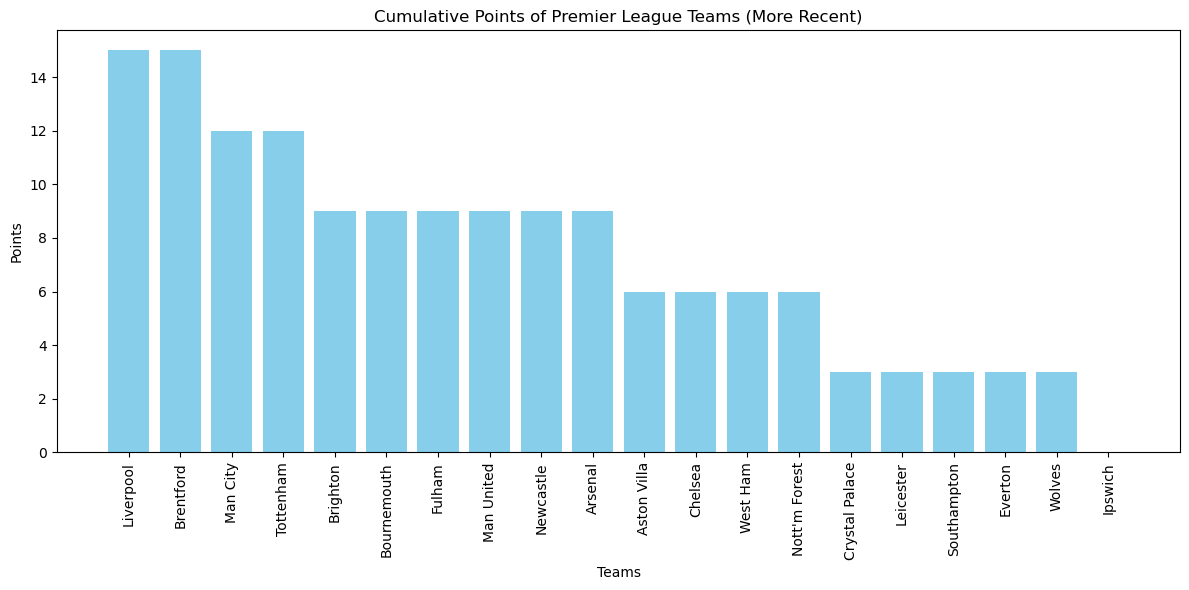

In [26]:
npoints = {}
#recent_data = training_data2

def update_npoints(team, pts): 
    if team in npoints: 
        npoints[team] += pts 
    else: 
        npoints[team] = pts


for index, row in training_data2.iterrows():
    nhome_team = row['HomeTeam']
    naway_team= row['AwayTeam']
    nresult = row['FTR']

    if nresult == 'H':
        update_npoints(nhome_team, 3)
        update_npoints(naway_team, 0)
    elif result =='A':
        update_npoints(nhome_team, 0)
        update_npoints(naway_team, 3)
    elif result == 'L':
        update_npoints(nhome_team, 1)
        update_npoints(naway_team, 1)


npoints_df = pd.DataFrame(list(npoints.items()), columns=['Team', 'Points'])
npoints_df = npoints_df.sort_values(by='Points', ascending=False).reset_index(drop=True)
print(npoints_df)


plt.figure(figsize=(12, 6)) 
plt.bar(npoints_df['Team'], npoints_df['Points'], color='skyblue') 
plt.xlabel('Teams') 
plt.ylabel('Points') 
plt.title('Cumulative Points of Premier League Teams (More Recent)') 
plt.xticks(rotation=90) 
plt.tight_layout() # Adjusts layout to prevent overlapping plt.show()

## Win Rate 

In [27]:

# Initialize dictionaries to store match counts and results
match_counts = {}
win_counts = {}

# Iterate over each match to update counts
for index, row in sub_data.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    result = row['FTR']  # Full Time Result

    # Skip rows with NaN in result
    if pd.isna(result):
        continue

    if (home_team, away_team) not in match_counts:
        match_counts[(home_team, away_team)] = 0
        win_counts[(home_team, away_team)] = {'H': 0, 'A': 0, 'D': 0}

    match_counts[(home_team, away_team)] += 1
    win_counts[(home_team, away_team)][result] += 1

# Calculate win rates
win_rates = {}

for teams, counts in win_counts.items():
    total_matches = match_counts[teams]
    win_rates[teams] = {
        'Home Win Rate': counts['H'] / total_matches,
        'Away Win Rate': counts['A'] / total_matches,
        'Draw Rate': counts['D'] / total_matches
    }

# Convert to DataFrame for easier viewing
win_rates_df = pd.DataFrame.from_dict(win_rates, orient='index')
win_rates_df.index = win_rates_df.index.map(lambda x: f"{x[0]} vs {x[1]}")
win_rates_df.reset_index(inplace=True)
win_rates_df.columns = ['Matchup', 'Home Win Rate', 'Away Win Rate', 'Draw Rate']

# Save the win rates to a CSV file
win_rates_df.to_csv('win_rates.csv', index=False)

print(win_rates_df)


                             Matchup  Home Win Rate  Away Win Rate  Draw Rate
0                Chelsea vs West Ham       0.714286       0.095238   0.190476
1           Leicester vs Aston Villa       0.300000       0.400000   0.300000
2               Tottenham vs Ipswich       0.333333       0.666667   0.000000
3            Man United vs Newcastle       0.727273       0.045455   0.227273
4               Arsenal vs Liverpool       0.440000       0.160000   0.400000
..                               ...            ...            ...        ...
365         Chelsea vs Nott'm Forest       0.000000       0.500000   0.500000
366         Nott'm Forest vs Arsenal       0.500000       0.500000   0.000000
367  Crystal Palace vs Nott'm Forest       0.000000       0.000000   1.000000
368              Brighton vs Ipswich       0.000000       0.000000   1.000000
369             Brentford vs Ipswich       1.000000       0.000000   0.000000

[370 rows x 4 columns]


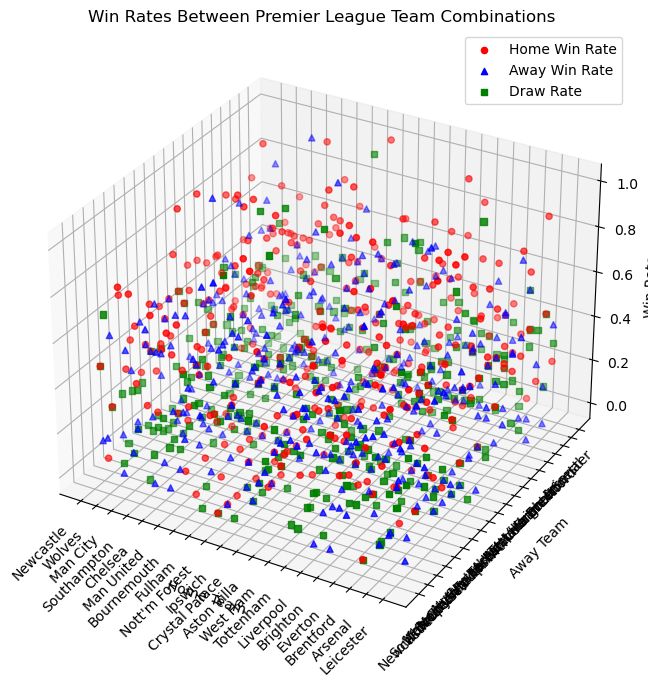

In [28]:


# Load the win rates data
win_rates_df = pd.read_csv('win_rates.csv')

# Prepare the data
teams = list(set(win_rates_df['Matchup'].str.split(' vs ').sum()))
team_indices = {team: idx for idx, team in enumerate(teams)}

home_teams = []
away_teams = []
home_win_rates = []
away_win_rates = []
draw_rates = []

for index, row in win_rates_df.iterrows():
    teams = row['Matchup'].split(' vs ')
    home_teams.append(team_indices[teams[0]])
    away_teams.append(team_indices[teams[1]])
    home_win_rates.append(row['Home Win Rate'])
    away_win_rates.append(row['Away Win Rate'])
    draw_rates.append(row['Draw Rate'])

# Create the 3D plot
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Home Win Rates
ax.scatter(home_teams, away_teams, home_win_rates, c='r', marker='o', label='Home Win Rate')
# Scatter plot for Away Win Rates
ax.scatter(home_teams, away_teams, away_win_rates, c='b', marker='^', label='Away Win Rate')
# Scatter plot for Draw Rates
ax.scatter(home_teams, away_teams, draw_rates, c='g', marker='s', label='Draw Rate')

# Set labels
ax.set_xlabel('Home Team')
ax.set_ylabel('Away Team')
ax.set_zlabel('Win Rate')
ax.set_title('Win Rates Between Premier League Team Combinations')

# Rotate labels for better readability
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=45)

# Add legend
ax.legend()

# Customizing x and y ticks to show team names
ax.set_xticks(list(team_indices.values()))
ax.set_xticklabels(list(team_indices.keys()), rotation=45, ha='right')
ax.set_yticks(list(team_indices.values()))
ax.set_yticklabels(list(team_indices.keys()), rotation=45, ha='right')

plt.show()



In [29]:

# Initialize dictionaries to store match counts and results
match_counts = {}
win_counts = {}

# Function to update the results
def update_result(team1, team2, result):
    pair = tuple(sorted([team1, team2]))
    if pair not in match_counts:
        match_counts[pair] = 0
        win_counts[pair] = {'Win': 0, 'Loss': 0, 'Draw': 0}
    match_counts[pair] += 1
    if result == 'H':
        win_counts[pair]['Win'] += 1
    elif result == 'A':
        win_counts[pair]['Loss'] += 1
    elif result == 'D':
        win_counts[pair]['Draw'] += 1

# Iterate over each match to update counts
for index, row in sub_data.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    result = row['FTR']  # Full Time Result

    # Skip rows with NaN in result
    if pd.isna(result):
        continue

    update_result(home_team, away_team, result)

# Calculate win rates
teams = list(set(sub_data['HomeTeam']).union(set(sub_data['AwayTeam'])))
win_rate_matrix = pd.DataFrame(index=teams, columns=teams, data=0.0)

for pair, results in win_counts.items():
    team1, team2 = pair
    total_matches = match_counts[pair]
    win_rate = (results['Win'] + results['Loss']) / total_matches  # Combine Win and Loss for rate calculation
    win_rate_matrix.at[team1, team2] = win_rate
    win_rate_matrix.at[team2, team1] = win_rate

# Convert to numerical indices for plotting
team_indices = {team: idx for idx, team in enumerate(teams)}
x_indices = win_rate_matrix.index.map(team_indices.get)
y_indices = win_rate_matrix.columns.map(team_indices.get)
z_values = win_rate_matrix.values

# Create the interactive 3D plot using Plotly
fig = go.Figure(data=[go.Surface(z=z_values, x=x_indices, y=y_indices, colorscale='Viridis')])

# Update the layout for better visualization
fig.update_layout(
    title='Win Rates Between Premier League Team Combinations',
    scene=dict(
        xaxis=dict(title='Team 1', tickmode='array', tickvals=list(team_indices.values()), ticktext=list(team_indices.keys())),
        yaxis=dict(title='Team 2', tickmode='array', tickvals=list(team_indices.values()), ticktext=list(team_indices.keys())),
        zaxis=dict(title='Win Rate')
    ),
    width=2400,
    height=2200
)

# Show the plot
fig.show()



In [30]:

# Initialize dictionaries to store match counts and results
match_counts = {}
win_counts = {}

# Function to update the results
def update_result(team1, team2, result):
    pair = tuple(sorted([team1, team2]))
    if pair not in match_counts:
        match_counts[pair] = 0
        win_counts[pair] = {'Win': 0, 'Loss': 0, 'Draw': 0}
    match_counts[pair] += 1
    if result == 'H':
        win_counts[pair]['Win'] += 1
    elif result == 'A':
        win_counts[pair]['Loss'] += 1
    elif result == 'D':
        win_counts[pair]['Draw'] += 1

# Iterate over each match to update counts
for index, row in sub_data.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    result = row['FTR']  # Full Time Result

    # Skip rows with NaN in result
    if pd.isna(result):
        continue

    update_result(home_team, away_team, result)

# Calculate win rates
teams = list(set(sub_data['HomeTeam']).union(set(sub_data['AwayTeam'])))
win_rate_matrix = pd.DataFrame(index=teams, columns=teams, data=0.0)

for pair, results in win_counts.items():
    team1, team2 = pair
    total_matches = match_counts[pair]
    win_rate = (results['Win'] + results['Loss']) / total_matches  # Combine Win and Loss for rate calculation
    win_rate_matrix.at[team1, team2] = win_rate
    win_rate_matrix.at[team2, team1] = win_rate

# Convert to numerical indices for plotting
team_indices = {team: idx for idx, team in enumerate(teams)}
x_indices = win_rate_matrix.index.map(team_indices.get)
y_indices = win_rate_matrix.columns.map(team_indices.get)
z_values = win_rate_matrix.values.flatten()

# Prepare the data for plotting
team_pairs = [(team1, team2) for team1 in teams for team2 in teams]
x = [team_indices[team1] for team1, team2 in team_pairs]
y = [team_indices[team2] for team1, team2 in team_pairs]
z = z_values

# Create the interactive 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=z,  # set color to the win rates
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Update the layout for better visualization
fig.update_layout(
    title='Win Rates Between Premier League Team Combinations',
    scene=dict(
        xaxis=dict(title='Team 1', tickmode='array', tickvals=list(team_indices.values()), ticktext=list(team_indices.keys())),
        yaxis=dict(title='Team 2', tickmode='array', tickvals=list(team_indices.values()), ticktext=list(team_indices.keys())),
        zaxis=dict(title='Win Rate')
    ),
    width=1200,
    height=800
)

# Show the plot
fig.show()
